<a href="https://colab.research.google.com/github/manjunath1005/Stacking/blob/main/Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads (1).csv"

df=pd.read_csv(path)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [7]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**Base** **Model**

In [10]:
base_models=[('LR',LogisticRegression()),
             ('DT',DecisionTreeClassifier(max_depth=3)),
             ("KNN",KNeighborsClassifier(n_neighbors=5))]

**Meta Model**

Meta model decides how to combine predictions

In [11]:
meta_model = LogisticRegression()

**Build Stacking Classifier**

In [12]:
classifier = StackingClassifier(estimators=base_models,final_estimator=meta_model,cv=5)
classifier.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('LR', LogisticRegression()),
                               ('DT', DecisionTreeClassifier(max_depth=3)),
                               ('KNN', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [13]:
y_pred=classifier.predict(x_test)

In [14]:
accuracy_score(y_test,y_pred)

0.9

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



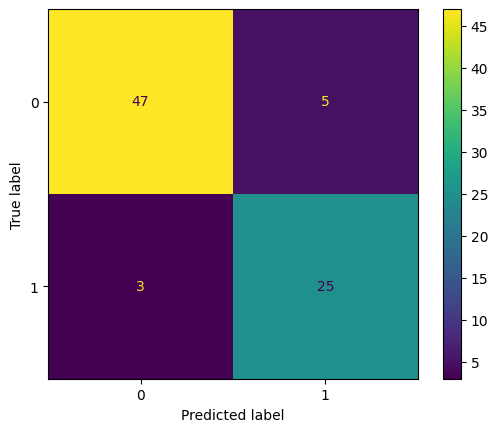

In [16]:
ConfusionMatrixDisplay.from_estimator(classifier,x_test,y_test)
plt.show()

In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/loan-prediction-problem-dataset")

print("Path to dataset files:", path)

100%|██████████| 12.6k/12.6k [00:00<00:00, 9.49MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/altruistdelhite04/loan-prediction-problem-dataset/versions/1


In [18]:
import os

os.listdir(path)

['train_u6lujuX_CVtuZ9i.csv', 'test_Y3wMUE5_7gLdaTN.csv']

In [19]:
df=pd.read_csv(path+'/train_u6lujuX_CVtuZ9i.csv')

In [20]:
df.to_csv('loan-prediction-dataset.csv',index=False)

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [23]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [24]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [25]:
df=df.drop(columns=['Loan_ID'])

In [26]:
categorical_cols = ['Gender','Married','Dependents','Self_Employed']

for col in categorical_cols:
    df.fillna({col:df[col].mode()[0]}, inplace=True)

In [27]:
numerical_cols = ['LoanAmount','Loan_Amount_Term','Credit_History']

for col in numerical_cols:
    df.fillna({col:df[col].median()}, inplace=True)

In [28]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

In [29]:
df = pd.get_dummies(df, drop_first=True)

In [30]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(max_iter=2000))
    ]),

    "Decision Tree": DecisionTreeClassifier(max_depth=5),

    "KNN": Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ])
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(name, "Accuracy:", accuracy_score(y_test, preds))

Logistic Regression Accuracy: 0.8617886178861789
Decision Tree Accuracy: 0.8292682926829268
KNN Accuracy: 0.8373983739837398


In [32]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.55      0.68        38
           1       0.83      0.96      0.89        85

    accuracy                           0.84       123
   macro avg       0.85      0.76      0.78       123
weighted avg       0.84      0.84      0.83       123



In [33]:
base_models = [
    ('lr', Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(max_iter=2000))
    ])),

    ('dt', DecisionTreeClassifier(max_depth=5)),

    ('knn',Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]))
]

In [34]:
meta_model = LogisticRegression(max_iter=2000)


In [35]:
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(max_iter=2000))
    ]),
    cv=5
)

stack_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('lr',
                                                 LogisticRegression(max_iter=2000))])),
                               ('dt', DecisionTreeClassifier(max_depth=5)),
                               ('knn',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('knn',
                                                 KNeighborsClassifier())]))],
                   final_estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                                   ('lr',
                                                    LogisticRegression(max_iter=2000))]))

In [36]:
stack_preds = stack_model.predict(X_test)

print("Stacked Accuracy:", accuracy_score(y_test, stack_preds))
print(classification_report(y_test, stack_preds))

Stacked Accuracy: 0.8617886178861789
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

